In [ ]:
!pip install wget
!pip install Sastrawi
!pip install nlp_id
!pip install unidecode
!pip install --upgrade gensim
!pip install sparknlp
!pip install pyspark

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=e388812f7dcace5535313a6414506bcf197a410634f97d27fa9877a9dbdac239
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 27.8 MB/s eta 0:00:00
  Created wheel for nlp_id: filename=nlp_id-0.1.15.0-py3-none-any.whl size=58153891 sha256=560b1df48fde99afd0beb4a64c3aad5073013392300bfee57552a51d9205a364
  Stored in directory: /root/.cache/pip/wheels/85/34/2a/deaf7b7896a1eed336b874e1a7732588d40bb7bdc0a824e73e
Successfully built nlp_id
  Attempting uninstall: pytest
    Found existing installation: pytest 7.4.3
    Uninstalling pytest-7.4.3:
 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import re
import os
import pickle
import warnings
import wget
import sklearn
import random
import nltk
import spacy
import textblob
import gensim
import Sastrawi
import sparknlp
import tensorflow as tf
from sparknlp.base import DocumentAssembler
from gensim.models import Word2Vec
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, GRU, SimpleRNN, Conv1D, MaxPooling1D, Flatten
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
# from keras.utils.data_utils import pad_sequences
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from nltk.corpus import stopwords
from nltk.tree import Tree
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter, OrderedDict
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from spacy.util import minibatch, compounding
from spacy import load, displacy
from spacy.training.example import Example
from nlp_id import stopword
from unidecode import unidecode
import io
import time
from datetime import timedelta
import logging
from gensim.models import FastText
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras import backend as K
from keras.optimizers.legacy import Adam
from sparknlp.annotator import ContextSpellCheckerModel, NorvigSweetingModel, SymmetricDeleteModel
logging.basicConfig(level=logging.INFO)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data_normalized_tweet = pd.read_csv('/content/drive/MyDrive/sample_dataset/normalized_tweet.csv')
data_tweet = pd.read_csv('/content/drive/MyDrive/sample_dataset/tweet.csv')
indo_dict = open("/content/drive/MyDrive/sample_dataset/slangword.txt").read()

display(data_normalized_tweet)

,Unnamed: 0,tweet
0,0,kata prabowo indonesia tidak harga bangsa asin...
1,1,batu langka tasbih jokowi hadiah habib luthfi ...
2,2,era jokowi ekonomi indonesia makin baik
3,3,sumatera selatan asi games dampak pd ekonomi l...
4,4,negara ngutang buat bngun infrastruktur udah d...
...,...,...
1810,1810,negarawan sejati sll bangga depan harga diri b...
1811,1811,1 hrs ceramah damai indonesia 2 ekonomi makin ...
1812,1812,bangun bangsa dgn dukung ekonomi negara sama p...
1813,1813,bantu maju ekonomi bangsa sama pak jokowi yuk


# Spell Checking

In [ ]:
def create_spell_check_dictionary(spell_check_data):
    spell_check_dict = {}
    lines = spell_check_data.strip().split("\n")
    for line in lines:
        key, value = line.split(":")
        spell_check_dict[key] = value
    return spell_check_dict

In [ ]:
spell_dictionary = create_spell_check_dictionary(indo_dict)
spell_dictionary

{'&': 'dan',
 '+': 'tambah',
 '/': 'atau',
 '=': 'sama dengan',
 'ababil': 'anak ingusan',
 'abal2': 'palsu',
 'abal': 'palsu',
 'ad': 'ada',
 'akooh': 'aku',
 'alay': 'norak',
 'albm': 'album',
 'ampe': 'sampai',
 'anjir': 'waw',
 'anyway': 'ngomong-ngomong',
 'aq': 'aku',
 'asap': 'secepatnya',
 'ato': 'atau',
 'atw': 'atau',
 'ava': 'foto profil',
 'baget': 'keras kepala',
 'baper': 'bawa perasaan',
 'bapuk': 'rusak',
 'bcr': 'bicara',
 'bebeb': 'pacar',
 'begin': 'awal',
 'bejibun': 'bertumpuk banyak',
 'bener': 'benar',
 'ber2': 'berdua',
 'ber3': 'bertiga',
 'better': 'lebih baik',
 'bf': 'pacar',
 'bgt': 'banget',
 'bhas': 'bahas',
 'bhg': 'bahagia',
 'bikin': 'buat',
 'binggo': 'banget',
 'bingit': 'banget',
 'bklan': 'bakalan',
 'bkn': 'bukan',
 'blg': 'bilang',
 'bnr': 'benar',
 'bnyk': 'banyak',
 'br': 'baru',
 'brb': 'akan segera kembali',
 'brjaya': 'berjaya',
 'bs': 'bisa',
 'bsk': 'besok',
 'btw': 'ngomong-ngomong',
 'cm': 'cuma',
 'cmiiw': 'koreksi saya',
 'cnt': 'cinta

In [ ]:
def tweet_spell_check(tweet):
    # Split tweet into words
    words = tweet.split()

    # Initialize a list to store corrected words
    corrected_words = []

    # Iterate through words in the tweet
    for word in words:
        # Check if the word is in the spell check dictionary
        if word in spell_dictionary:
            corrected_word = spell_dictionary[word]
            corrected_words.append(corrected_word)
        else:
            corrected_words.append(word)  # Keep the word as is if not found in the dictionary

    # Join the corrected words back into a tweet
    corrected_tweet = ' '.join(corrected_words)

    return corrected_tweet

In [ ]:
tweet_spell_corrected = []

for idx in range(len(data_normalized_tweet['tweet'])):
    corrected = tweet_spell_check(data_normalized_tweet['tweet'][idx])
    tweet_spell_corrected.append(corrected)

display(data_normalized_tweet['tweet'][248])
display(tweet_spell_corrected[248])

'pikir kembang esport main doang aplikasi yg smartphone byk yg mulai dr main doang terus jd aplikasi2 yg byk manfaat kata siapa anggur gaji byk baca buka wawas jgn mpermalukan gen z'

'pikir kembang esport main doang aplikasi yang smartphone banyak yang mulai dari main doang terus jadi aplikasi2 yang banyak manfaat kata siapa anggur gaji banyak baca buka wawas jangan mpermalukan generasi z'

# Stopwords Removing

In [ ]:
raw_stopwords = ['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharusnya', 'sebetulnya', 'setiap', 'setidaknya', 'sesuatu', 'pasti', 'saja', 'toh', 'walau', 'tolong', 'tentu', 'amat', 'apalagi', 'bagaimanapun']

In [ ]:
def remove_stopwords_indo(text):
    # Kode untuk menghapus stopwords
    text_lower = text.lower()
    stop_words = set(raw_stopwords)
    tokens = word_tokenize(text_lower)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

In [ ]:
tweet_no_stopwords = []

for idx in range(len(tweet_spell_corrected)):
    cleaned = remove_stopwords_indo(tweet_spell_corrected[idx])
    tweet_no_stopwords.append(cleaned)

display(tweet_spell_corrected[248])
display(tweet_no_stopwords[248])

'pikir kembang esport main doang aplikasi yang smartphone banyak yang mulai dari main doang terus jadi aplikasi2 yang banyak manfaat kata siapa anggur gaji banyak baca buka wawas jangan mpermalukan generasi z'

'pikir kembang esport main doang aplikasi smartphone banyak mulai main doang terus jadi aplikasi2 banyak manfaat kata siapa anggur gaji banyak baca buka wawas jangan mpermalukan generasi z'

# Normalization Stemming

In [ ]:
def normalization_stemming(text):
  stemmer = StemmerFactory().create_stemmer()
  cleaned_text = stemmer.stem(text)
  return cleaned_text

In [ ]:
tweet_stemmed = []
for idx in range(len(tweet_no_stopwords)):
    normalized = normalization_stemming(tweet_no_stopwords[idx])
    tweet_stemmed.append(normalized)

display(tweet_no_stopwords[1])
display(tweet_stemmed[1])

'batu langka tasbih jokowi hadiah habib luthfi harga mercy'

'batu langka tasbih jokowi hadiah habib luthfi harga mercy'

In [ ]:
display(tweet_no_stopwords[1])
display(tweet_stemmed[1])
print('--'*30)
display(tweet_no_stopwords[2])
display(tweet_stemmed[2])
print('--'*30)
display(tweet_no_stopwords[3])
display(tweet_stemmed[3])
print('--'*30)
display(tweet_no_stopwords[4])
display(tweet_stemmed[4])
print('--'*30)
display(tweet_no_stopwords[5])
display(tweet_stemmed[5])
print('--'*30)

'batu langka tasbih jokowi hadiah habib luthfi harga mercy'

'batu langka tasbih jokowi hadiah habib luthfi harga mercy'

------------------------------------------------------------


'era jokowi ekonomi indonesia makin baik'

'era jokowi ekonomi indonesia makin baik'

------------------------------------------------------------


'sumatera selatan asi games dampak ekonomi langsung prediksi capai 185 triliun indonesia maju jokowi hebat'

'sumatera selatan asi games dampak ekonomi langsung prediksi capai 185 triliun indonesia maju jokowi hebat'

------------------------------------------------------------


'negara ngutang buat bngun infrastruktur udah dipake masyarakat terus masyarakat ngeluh negara ngutang negara ngutang utang bayar kalo negara dapet hasil hasil negara ya pajak'

'negara ngutang buat bngun infrastruktur udah dipake masyarakat terus masyarakat ngeluh negara ngutang negara ngutang utang bayar kalo negara dapet hasil hasil negara ya pajak'

------------------------------------------------------------


'bisikin bapak jokowi cuma mikirin putar duit golong esports kecil sekian besar tumbuh ekonomi indonesia bukan fundamental betul kata prabowo bhs sederhana mrpkan aspek fundamental ekonomi'

'bisikin bapak jokowi cuma mikirin putar duit golong esports kecil sekian besar tumbuh ekonomi indonesia bukan fundamental betul kata prabowo bhs sederhana mrpkan aspek fundamental ekonomi'

------------------------------------------------------------


# Tokenizer & Vectorization

In [ ]:
tweet_stemmed = [str(text).lower() if isinstance(text, str) else str(text) for text in tweet_stemmed]
tok = Tokenizer()
tok.fit_on_texts(tweet_stemmed)
tweet_vecto = tok.texts_to_sequences(tweet_stemmed)
tweet_vecto_matrix = pad_sequences(tweet_vecto, maxlen=60)

In [ ]:
tweet_tokenized = []

for idx in range(len(tweet_stemmed)):
  tokens = word_tokenize(tweet_stemmed[idx])
  tweet_tokenized.append(tokens)

display(tweet_stemmed[10])
display(tweet_tokenized[10])

'pilih pimpin jelas banyak capai nah 5 capai ekonomi lama perintah jokowi coblos 01 yuk kerja'

['pilih',
 'pimpin',
 'jelas',
 'banyak',
 'capai',
 'nah',
 '5',
 'capai',
 'ekonomi',
 'lama',
 'perintah',
 'jokowi',
 'coblos',
 '01',
 'yuk',
 'kerja']

In [ ]:
tweet_words_flattened = list(itertools.chain(*tweet_tokenized))
tweet_words_count = Counter(tweet_words_flattened)
tweet_words_count_sorted = OrderedDict(sorted(tweet_words_count.items(), key = lambda kv : kv[1], reverse=False))

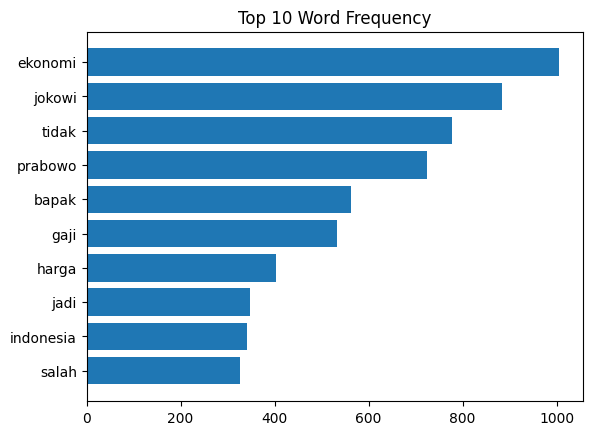

In [ ]:
plt.barh(
    list(tweet_words_count_sorted.keys())[-10:],
    list(tweet_words_count_sorted.values())[-10:]
)

plt.title('Top 10 Word Frequency')
plt.show()

In [ ]:
data_tweet = pd.read_csv('/content/drive/MyDrive/sample_dataset/tweet.csv')

In [ ]:
mapping = {
    "negatif": 0,
    "netral": 1,
    "positif": 1
}

data_tweet['sentimen'] = [mapping[label] for label in data_tweet['sentimen']]
target = data_tweet['sentimen']

In [ ]:
display(len(target))
display(target)

1815

0       0
1       1
2       1
3       1
4       0
       ..
1810    1
1811    1
1812    1
1813    1
1814    1
Name: sentimen, Length: 1815, dtype: int64

In [ ]:
display(len(tweet_vecto_matrix))
display(tweet_vecto_matrix)

1815

array([[   0,    0,    0, ...,   19,   53, 1555],
       [   0,    0,    0, ..., 2253,    7, 2254],
       [   0,    0,    0, ...,    9,  139,   34],
       ...,
       [   0,    0,    0, ...,    2,  404,   21],
       [   0,    0,    0, ...,    5,    2,  613],
       [   0,    0,    0, ...,   37, 1129, 1394]], dtype=int32)

# Split Data

In [ ]:
X = tweet_vecto_matrix
Y = target

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))

# Modelling

In [ ]:
# Create a Sequential model
model = Sequential()
kernel_size = 3
max_words = 30000
max_len = 60

# Add an Embedding layer
embedding_dim = 64  # Dimension of word embeddings
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))

model.add(LSTM(units=128))

#add fc1 units
fc1_units = 256
model.add(Dense(units=fc1_units))

# activation
model.add(Activation('relu'))

# Add Droput
model.add(Dropout(rate=0.5))

# Add a Dense (fully connected) layer for output
num_classes = 1  # Number of sentiment classes (positive and negative)
model.add(Dense(units=num_classes,))

# Activation
model.add(Activation('sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', precision, recall, f1_score])
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', precision, recall, f1_score])
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 150, 64)           1920000   
                                                                 
 lstm_15 (LSTM)              (None, 128)               98816     
                                                                 
 dense_44 (Dense)            (None, 256)               33024     
                                                                 
 activation_44 (Activation)  (None, 256)               0         
                                                                 
 dropout_32 (Dropout)        (None, 256)               0         
                                                                 
 dense_45 (Dense)            (None, 1)                 257       
                                                                 
 activation_45 (Activation)  (None, 1)               

In [ ]:
# Train the model
model.fit(
    X_train,
    Y_train,
    batch_size=256, epochs=20,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 0.6885 - accuracy: 0.6171 - precision: 0.6712 - recall: 0.8526 - f1_score: 0.7267 - val_loss: 0.6742 - val_accuracy: 0.6929 - val_precision: 0.6929 - val_recall: 1.0000 - val_f1_score: 0.8186
Epoch 2/20
4/4 [==============================] - 4s 1s/step - loss: 0.6624 - accuracy: 0.6663 - precision: 0.6662 - recall: 1.0000 - f1_score: 0.7996 - val_loss: 0.6122 - val_accuracy: 0.6929 - val_precision: 0.6929 - val_recall: 1.0000 - val_f1_score: 0.8186
Epoch 3/20
4/4 [==============================] - 3s 888ms/step - loss: 0.6331 - accuracy: 0.6663 - precision: 0.6662 - recall: 1.0000 - f1_score: 0.7989 - val_loss: 0.6095 - val_accuracy: 0.6929 - val_precision: 0.6929 - val_recall: 1.0000 - val_f1_score: 0.8186
Epoch 4/20
4/4 [==============================] - 3s 874ms/step - loss: 0.6179 - accuracy: 0.6663 - precision: 0.6666 - recall: 1.0000 - f1_score: 0.7997 - val_loss: 0.6163 - val_accuracy: 0.6929 - val_precision: 0

# Model Evaluate

In [ ]:
display(len(X_test))
display(len(Y_test))

545

545

In [ ]:
loss, accr, presc, recl, f1 = model.evaluate(X_test, Y_test)

18/18 [==============================] - 1s 73ms/step - loss: 0.6206 - accuracy: 0.6716 - precision: 0.6354 - recall: 0.9444 - f1_score: 0.7580


In [ ]:
print(f'Test loss: {loss:.4f},\nTest accuracy: {accr:.4f},\nTest Precission: {presc:.4f},\nTest Recall: {recl:.4f},\nTest F1Score: {f1:.4f},')

Test loss: 0.5508,
Test accuracy: 0.7174,
Test Precission: 0.7455,
Test Recall: 0.7469,
Test F1Score: 0.7444,


### Predict

In [ ]:
y_preds = model.predict(X_test)

18/18 [==============================] - 1s 16ms/step


array([[101,  78],
       [ 76, 290]])

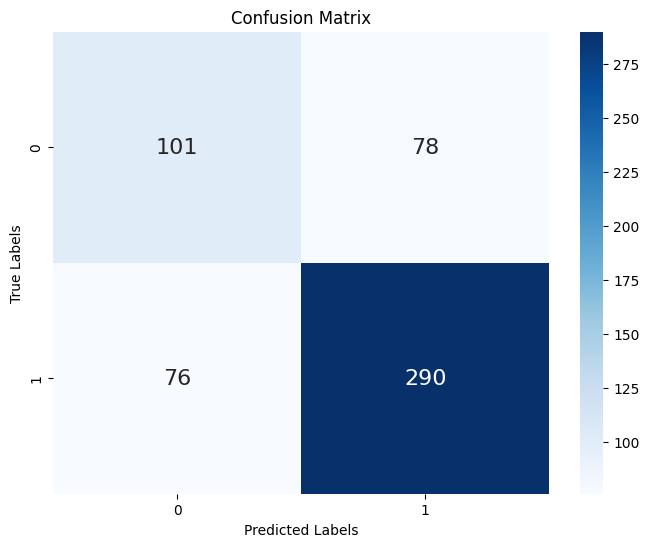

In [ ]:
cm = confusion_matrix(Y_test, tf.round(y_preds))
display(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(Y_test, tf.round(y_preds)))

              precision    recall  f1-score   support

           0       0.57      0.56      0.57       179
           1       0.79      0.79      0.79       366

    accuracy                           0.72       545
   macro avg       0.68      0.68      0.68       545
weighted avg       0.72      0.72      0.72       545



# RandomForest

In [ ]:
data_tweet = pd.read_csv('/content/drive/MyDrive/sample_dataset/tweet.csv')

In [ ]:
mapping = {
    "negatif": 0,
    "netral": 1,
    "positif": 2
}

data_tweet['sentimen'] = [mapping[label] for label in data_tweet['sentimen']]
target = data_tweet['sentimen']

In [ ]:
X = tweet_vecto_matrix
Y = target

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
model_rf = RandomForestClassifier()

In [ ]:
model_rf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
model_rf_score = model_rf.score(X_test, Y_test)
print(model_rf_score)

0.47889908256880737


In [ ]:
y_pred = model_rf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.43      0.44       179
           1       0.55      0.62      0.58       177
           2       0.43      0.40      0.41       189

    accuracy                           0.48       545
   macro avg       0.48      0.48      0.48       545
weighted avg       0.47      0.48      0.48       545



# RNN 2

In [ ]:
# Create a Sequential model
model = Sequential()
max_words = 40000
max_len = 60

# Add an Embedding layer
embedding_dim = 128
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=64))  # Another LSTM layer
fc1_units = 128
model.add(Dense(units=fc1_units))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))
num_classes = 3
model.add(Dense(units=num_classes,))
model.add(Activation('softmax'))

# Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', precision, recall, f1_score])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', precision, recall, f1_score])
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_45 (Embedding)    (None, 60, 128)           5120000   
                                                                 
 lstm_39 (LSTM)              (None, 60, 128)           131584    
                                                                 
 lstm_40 (LSTM)              (None, 64)                49408     
                                                                 
 dense_88 (Dense)            (None, 128)               8320      
                                                                 
 activation_88 (Activation)  (None, 128)               0         
                                                                 
 dropout_54 (Dropout)        (None, 128)               0         
                                                                 
 dense_89 (Dense)            (None, 3)               

In [ ]:
# Train the model
model.fit(
    X_train,
    Y_train,
    batch_size=128, epochs=15,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)]
    )

Epoch 1/15
8/8 [==============================] - 4s 463ms/step - loss: 0.5801 - accuracy: 0.7746 - precision: 1.0564 - recall: 1.3718 - f1_score: 1.1915 - val_loss: 1.2707 - val_accuracy: 0.4803 - val_precision: 0.9029 - val_recall: 1.2362 - val_f1_score: 1.0436
Epoch 2/15
8/8 [==============================] - 5s 588ms/step - loss: 0.3695 - accuracy: 0.8642 - precision: 0.7780 - recall: 1.1499 - f1_score: 0.9274 - val_loss: 1.4105 - val_accuracy: 0.4961 - val_precision: 0.8135 - val_recall: 1.1644 - val_f1_score: 0.9575


In [ ]:
loss, accr, presc, recl, f1 = model.evaluate(X_test, Y_test)

18/18 [==============================] - 2s 95ms/step - loss: 1.4260 - accuracy: 0.4862 - precision: 0.7101 - recall: 1.0230 - f1_score: 0.8357


In [ ]:
print(f'Test loss: {loss:.4f},\nTest accuracy: {accr:.4f},\nTest Precission: {presc:.4f},\nTest Recall: {recl:.4f},\nTest F1Score: {f1:.4f},')

Test loss: 1.0246,
Test accuracy: 0.5872,
Test Precission: 0.9300,
Test Recall: 1.1615,
Test F1Score: 1.0272,


In [ ]:
y_pred = model_rf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.44      0.43       179
           1       0.56      0.60      0.58       177
           2       0.42      0.37      0.39       189

    accuracy                           0.47       545
   macro avg       0.47      0.47      0.47       545
weighted avg       0.47      0.47      0.47       545



In [ ]:
data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1815 non-null   int64 
 1   sentimen    1815 non-null   int64 
 2   tweet       1815 non-null   object
dtypes: int64(2), object(1)
memory usage: 42.7+ KB


In [ ]:
data_tweet.head()

,Unnamed: 0,sentimen,tweet
0,0,0,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,1,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,1,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,2,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,0,Negara kita ngutang buat bngun infrastruktur y...


In [ ]:
data_tweet['sentimen'].value_counts()

2    612
1    607
0    596
Name: sentimen, dtype: int64